In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing the necessary module to fetch the dataset from the UCI repository
from ucimlrepo import fetch_ucirepo 

In [3]:
# fetch dataset 
adult = fetch_ucirepo(id=2)

In [4]:
# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

In [5]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [6]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [7]:
# metadata 
adult.metadata

{'uci_id': 2,
 'name': 'Adult',
 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult',
 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv',
 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ',
 'area': 'Social Science',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 48842,
 'num_features': 14,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'],
 'target_col': ['income'],
 'index_col': None,
 'has_missing_values': 'yes',
 'missing_values_symbol': 'NaN',
 'year_of_dataset_creation': 1996,
 'last_updated': 'Mon Sep 09 2024',
 'dataset_doi': '10.24432/C5XW20',
 'creators': ['Barry Becker', 'Ronny Kohavi'],
 'intro_paper': None,
 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the follow

In [8]:
# variable information 
adult.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,N/A,None,no
1,workclass,Feature,Categorical,Income,"Private, Self-emp-not-inc, Self-emp-inc, Feder...",None,yes
2,fnlwgt,Feature,Integer,None,None,None,no
3,education,Feature,Categorical,Education Level,"Bachelors, Some-college, 11th, HS-grad, Prof-...",None,no
4,education-num,Feature,Integer,Education Level,None,None,no
5,marital-status,Feature,Categorical,Other,"Married-civ-spouse, Divorced, Never-married, S...",None,no
6,occupation,Feature,Categorical,Other,"Tech-support, Craft-repair, Other-service, Sal...",None,yes
7,relationship,Feature,Categorical,Other,"Wife, Own-child, Husband, Not-in-family, Other...",None,no
8,race,Feature,Categorical,Race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,...",None,no
9,sex,Feature,Binary,Sex,"Female, Male.",None,no


In [9]:
import pandas as pd

# Combine features and target into a single DataFrame
df = pd.concat([X, y], axis=1)

# Display the first few rows to verify the merge
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [10]:
# Check for missing values
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [11]:
# Dropping rows with missing values
df = df.dropna()
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [12]:
# List of categorical columns to encode
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 
                       'relationship', 'race', 'sex', 'native-country']

# One-hot encode the categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
# Converting boolean columns to integer (0 and 1)
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Creating a new 'sex' column with 'Male' for 1 and 'Female' for 0
if 'sex_Male' in df.columns:
    # Map '1' to 'Male' and '0' to 'Female' using the 'sex_Male' column
    df['sex'] = df['sex_Male'].map({1: 'Male', 0: 'Female'})

df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
# Cleaning the 'income' column to ensure correct values
df['income'].unique()  # Check unique values before cleaning

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

In [16]:
# Remove trailing dots from the 'income' column values
df['income'] = df['income'].str.replace(r'\.$', '', regex=True)

# Verify the changes by printing unique values after cleaning
df['income'].unique()  # Check unique values after cleaning

array(['<=50K', '>50K'], dtype=object)

In [17]:
# Creating a binary 'IncomeBracket' column where '>50K' is 1 and '<=50K' is 0
df['IncomeBracket'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

df['IncomeBracket'].unique()

array([0, 1])

In [18]:
# Extracting and combining columns related to workclass and occupation
workclass_cols = [col for col in df.columns if col.startswith('workclass_')]
occupation_cols = [col for col in df.columns if col.startswith('occupation_')]

# Combine workclass columns into 'WorkClass' and occupation columns into 'Occupation'
df['WorkClass'] = df[workclass_cols].idxmax(axis=1).str.replace('workclass_', '')
df['Occupation'] = df[occupation_cols].idxmax(axis=1).str.replace('occupation_', '')

# Combine 'WorkClass' and 'Occupation' into a new column 'workclass'
df['workclass'] = df['WorkClass'] + '_' + df['Occupation']

# Display the first few rows of the 'workclass' column
df['workclass'].head()

C:\Users\Priyanshu Ghosh\AppData\Local\Temp\ipykernel_15996\3791266898.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['workclass'] = df['WorkClass'] + '_' + df['Occupation']


0              State-gov_Adm-clerical
1    Self-emp-not-inc_Exec-managerial
2           Private_Handlers-cleaners
3           Private_Handlers-cleaners
4              Private_Prof-specialty
Name: workclass, dtype: object

##### workclass is the new column 'WorkClass_Occupation'

In [19]:
# Calculating the average age per WorkClass
if 'workclass' in df.columns and 'age' in df.columns:
    avg_age_per_workclass = df.groupby('workclass')['age'].mean()
    print("Average age per workclass:\n", avg_age_per_workclass)
    df['AvgAgePerWorkClass'] = df['workclass'].map(avg_age_per_workclass)
else:
    print("Error: Required columns for age calculation are missing.") 

Average age per workclass:
 workclass
Federal-gov_Adm-clerical         41.343952
Federal-gov_Armed-Forces         31.785714
Federal-gov_Craft-repair         43.516129
Federal-gov_Exec-managerial      44.045113
Federal-gov_Farming-fishing      45.777778
                                   ...    
Without-pay_Handlers-cleaners    43.000000
Without-pay_Machine-op-inspct    48.000000
Without-pay_Other-service        45.500000
Without-pay_Sales                51.000000
Without-pay_Transport-moving     65.000000
Name: age, Length: 84, dtype: float64


C:\Users\Priyanshu Ghosh\AppData\Local\Temp\ipykernel_15996\826243260.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['AvgAgePerWorkClass'] = df['workclass'].map(avg_age_per_workclass)


In [20]:
# Handling the education columns by extracting relevant features
education_cols = [col for col in df.columns if col.startswith('education_')]
if education_cols:
    df['Education'] = df[education_cols].idxmax(axis=1).str.replace('education_', '') 

df['Education'].unique()

C:\Users\Priyanshu Ghosh\AppData\Local\Temp\ipykernel_15996\4245404672.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Education'] = df[education_cols].idxmax(axis=1).str.replace('education_', '')


array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [21]:
# Calculating the proportion of individuals earning more than 50K per education level
if 'Education' in df.columns:
    proportion_earning_50K = df.groupby('Education')['IncomeBracket'].mean()
    print("Proportion earning more than 50K per education level:\n", proportion_earning_50K)
    df['ProportionEarning50K'] = df['Education'].map(proportion_earning_50K)
else:
    print("Error: Required columns for education calculation are missing.")

Proportion earning more than 50K per education level:
 Education
11th            0.056781
12th            0.074250
1st-4th         0.033473
5th-6th         0.052632
7th-8th         0.065789
9th             0.054422
Assoc-acdm      0.259898
Assoc-voc       0.256146
Bachelors       0.415303
Doctorate       0.730241
HS-grad         0.160192
Masters         0.549425
Preschool       0.012821
Prof-school     0.743590
Some-college    0.194159
Name: IncomeBracket, dtype: float64


C:\Users\Priyanshu Ghosh\AppData\Local\Temp\ipykernel_15996\303101068.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['ProportionEarning50K'] = df['Education'].map(proportion_earning_50K)


In [22]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native-country_Vietnam,native-country_Yugoslavia,sex,IncomeBracket,WorkClass,Occupation,workclass,AvgAgePerWorkClass,Education,ProportionEarning50K
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,Male,0,State-gov,Adm-clerical,State-gov_Adm-clerical,38.021448,Bachelors,0.415303
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,Male,0,Self-emp-not-inc,Exec-managerial,Self-emp-not-inc_Exec-managerial,47.608919,Bachelors,0.415303
2,38,215646,9,0,0,40,<=50K,0,0,0,...,0,0,Male,0,Private,Handlers-cleaners,Private_Handlers-cleaners,32.293688,HS-grad,0.160192
3,53,234721,7,0,0,40,<=50K,0,0,0,...,0,0,Male,0,Private,Handlers-cleaners,Private_Handlers-cleaners,32.293688,11th,0.056781
4,28,338409,13,0,0,40,<=50K,0,0,0,...,0,0,Female,0,Private,Prof-specialty,Private_Prof-specialty,38.962600,Bachelors,0.415303


In [23]:
# Saving the cleaned DataFrame to a CSV file
df.to_csv('adult_cleaned.csv', index=False)
print("Data cleaning and processing complete. Cleaned data saved to 'adult_cleaned.csv'.")

Data cleaning and processing complete. Cleaned data saved to 'adult_cleaned.csv'.


In [24]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Visualize Income Distribution by Education

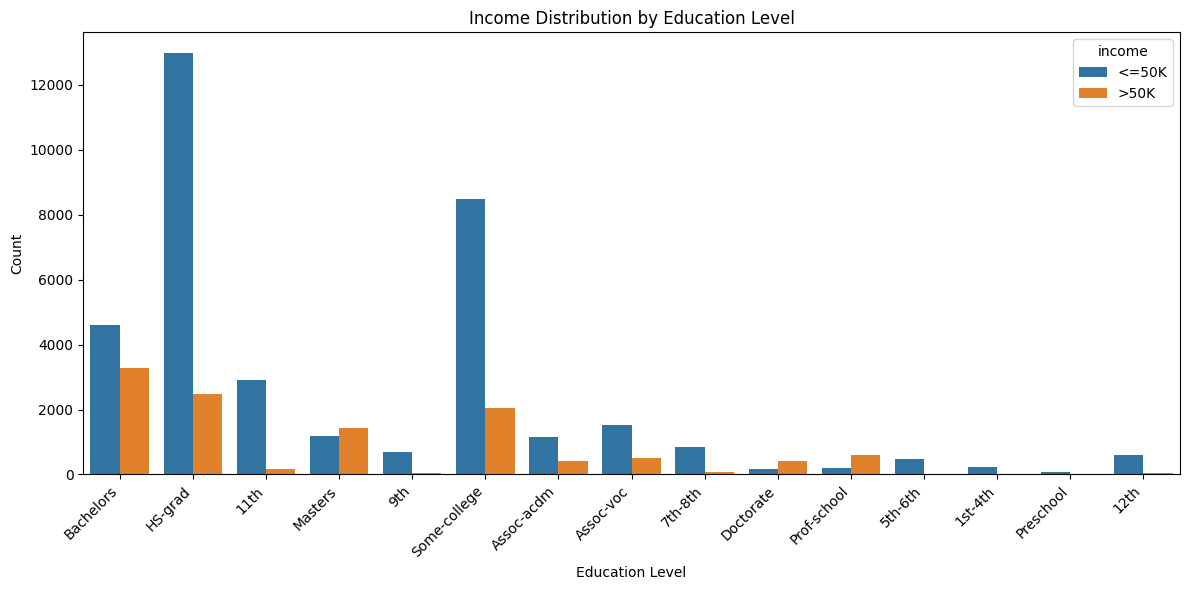

In [26]:
# Set up the plot
plt.figure(figsize=(12, 6))

# Create a count plot for income distribution by education
sns.countplot(data=df, x='Education', hue='income')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Add titles and labels
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Display the plot
plt.tight_layout()
plt.show()

Create a Heatmap of Correlations Between Numeric Variables

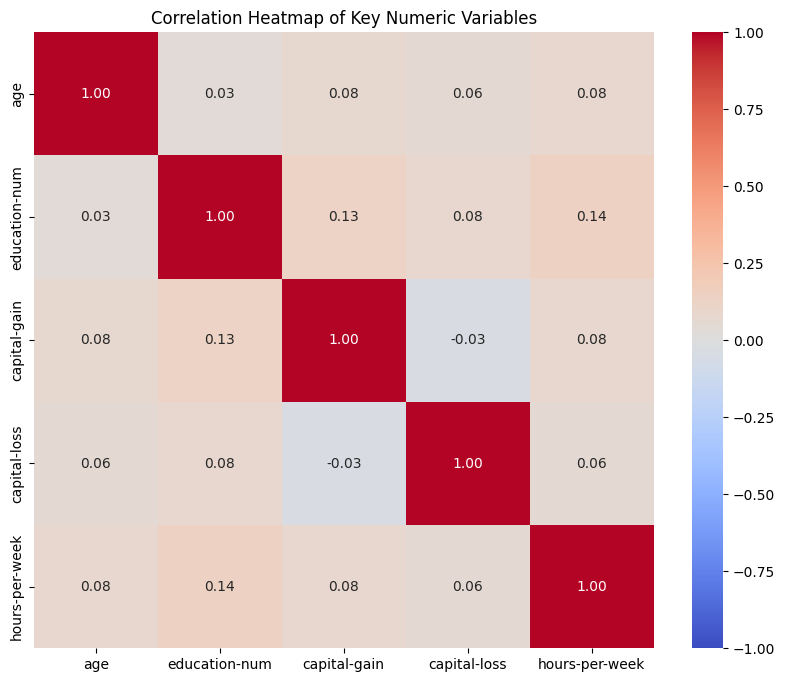

In [27]:
# Select only the relevant numeric columns for the heatmap
key_numeric_cols = df[['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]

# Calculate the correlation matrix for the selected columns
correlation_matrix = key_numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    vmin=-1, 
    vmax=1, 
    annot_kws={"size": 10}
)
plt.title('Correlation Heatmap of Key Numeric Variables')
plt.show() 